## XOR 문제를 Neural Network로 풀어보기

In [4]:
import numpy as np

In [5]:
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

In [6]:
print(X)
print(X.shape)

[[0 0 1 1]
 [0 1 0 1]]
(2, 4)


In [7]:
print(Y)
print(Y.shape)

[[0 1 1 0]]
(1, 4)


In [19]:
def init_random_parameters (num_hidden = 2, deviation = 1):

    W1 = np.random.rand(2,num_hidden)*deviation
    B1 = np.random.random((num_hidden,1))*deviation
    W2 = np.random.rand(num_hidden,1)*deviation
    B2 = np.random.random((1,1))*deviation
    return W1, B1, W2, B2

In [20]:
W1, B1, W2, B2 = init_parameters()

In [10]:
W1.shape, W2.shape, B1.shape, B2.shape

((2, 2), (2, 1), (2, 1), (1, 1))

In [11]:
def affine (W, X, B):
    return np.dot(W.T, X) + B

def sigmoid (z):
    return 1./(1+np.exp(-1*z))

In [12]:
Z2 = affine(W2,X, B2)
Y_hat = sigmoid(Z2)

In [13]:
print(Y_hat)

[[0.5 0.5 0.5 0.5]]


In [14]:
def loss_eval (_params):
    
    W1, B1, W2, B2 = _params
    
    # Forward: input Layer
    Z1 = affine(W1, X, B1)
    H  = sigmoid(Z1)

    # Forward: Hidden Layer
    Z2 = affine(W2, H, B2)
    Y_hat = sigmoid(Z2)

    loss = 1./X.shape[1] * np.sum(-1 * (Y * np.log(Y_hat) + (1-Y) * np.log(1-Y_hat)))
    return Z1, H, Z2, Y_hat, loss

loss_eval ([W1, B1, W2, B2])[-1]

0.6931471805599453

In [15]:
loss_eval ([W1, B1, W2, B2])[-1]

0.6931471805599453

In [16]:
def get_gradients (_params):
       
    W1, B1, W2, B2 = _params
    m = X.shape[1]
    
    Z1, H, Z2, Y_hat, loss = loss_eval([W1, B1, W2, B2])
    
    # BackPropagate: Hidden Layer
    dW2 = np.dot(H, (Y_hat-Y).T)
    dB2 = 1. / 4. * np.sum(Y_hat-Y, axis=1, keepdims=True)    
    dH  = np.dot(W2, Y_hat-Y)

    # BackPropagate: Input Layer
    dZ1 = dH * H * (1-H)
    dW1 = np.dot(X, dZ1.T)
    dB1 = 1. / 4. * np.sum(dZ1, axis=1, keepdims=True)
    
    return [dW1, dB1, dW2, dB2], loss

In [28]:
def optimize (_params, learning_rate = 0.1, iteration = 1000, sample_size = 0):
    
    params = np.copy(_params)

    loss_trace = []

    for epoch in range(iteration):
        
        dparams, loss = get_gradients(params)
        
        for param, dparam in zip(params, dparams):
            param += - learning_rate * dparam
        
        if (epoch % 100 == 0):
            loss_trace.append(loss)
        
    _, _, _, Y_hat_predict, _ = loss_eval(params)
    
    for i in range(Y_hat_predict.shape[1]):

        Y_hat_predict[0, i] = 1 if Y_hat_predict[0, i] > 0.5 else 0
    
    return params,loss_trace, Y_hat_predict

[[0. 1. 1. 0.]]


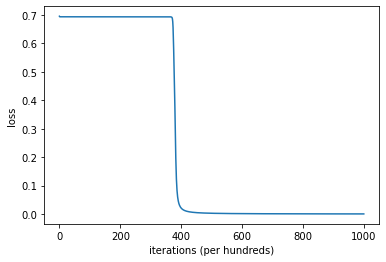

In [29]:
import matplotlib.pyplot as plt

params = init_random_parameters(2, 0.1)
new_params, loss_trace, Y_hat_predict = optimize(params, 0.1, 100000)
print(Y_hat_predict)
# Plot learning curve (with costs)
plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.show()